# Augmentation

In [1]:
import sys
sys.path.append('../../')

from dl.data.objdetn import datasets
from dl.data.objdetn import transforms, target_transforms, augmentations, utils

%matplotlib notebook
import matplotlib.pyplot as plt
from dl.data.utils.converter import toVisualizeRectRGBimg

# Geometric distortions

## Random Expand

[[140  40 288 214]]
(140, 40) (288, 214)


<IPython.core.display.Javascript object>


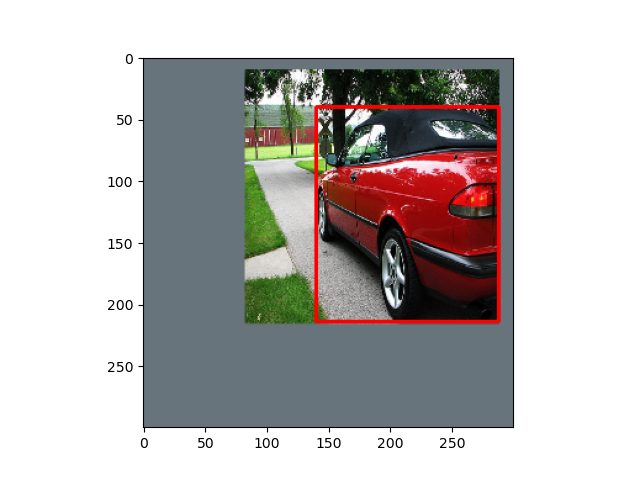

[[ 23  64  52 127]]
(23, 64) (52, 127)


<IPython.core.display.Javascript object>


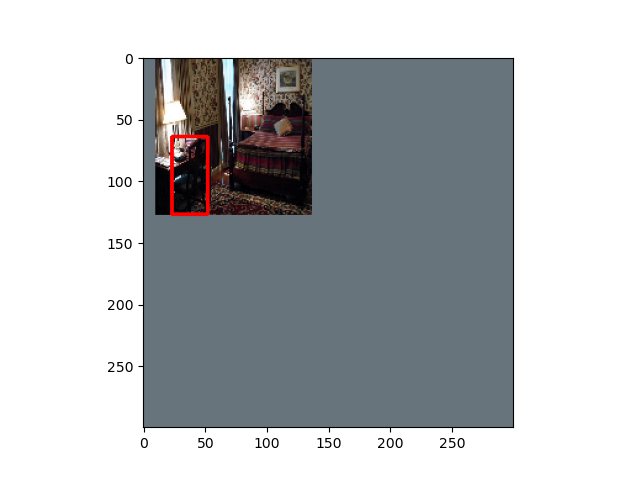

[[105  87 143 112]]
(105, 87) (143, 112)


<IPython.core.display.Javascript object>


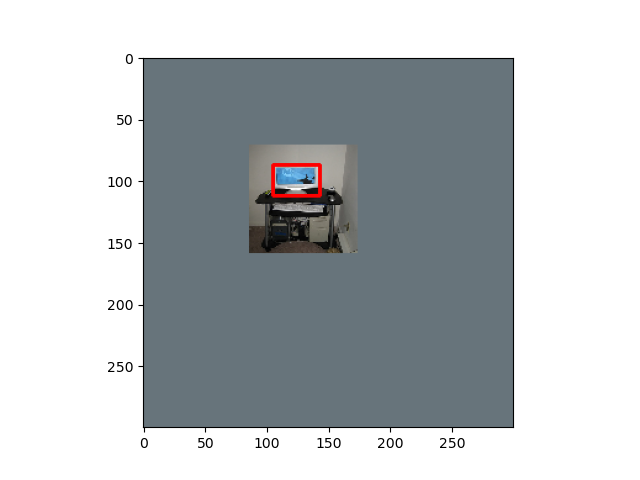

[[ 11 133  99 178]]
(11, 133) (99, 178)


<IPython.core.display.Javascript object>


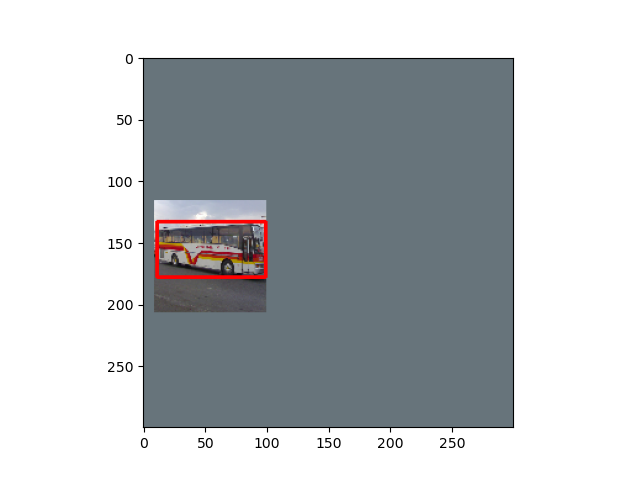

In [2]:
augmentation = augmentations.RandomExpand(filled_rgb_mean=(103.939, 116.779, 123.68), rmin=1, rmax=4, p=1)

transform = transforms.Compose(
    [transforms.Resize((300, 300)),
     transforms.ToTensor()]
)
target_transform = target_transforms.Compose(
    [target_transforms.Corners2Centroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums, add_background=True),
     target_transforms.ToTensor()]
)
train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Sample

[[ 28   1 300 300]]
(28, 1) (300, 300)


<IPython.core.display.Javascript object>


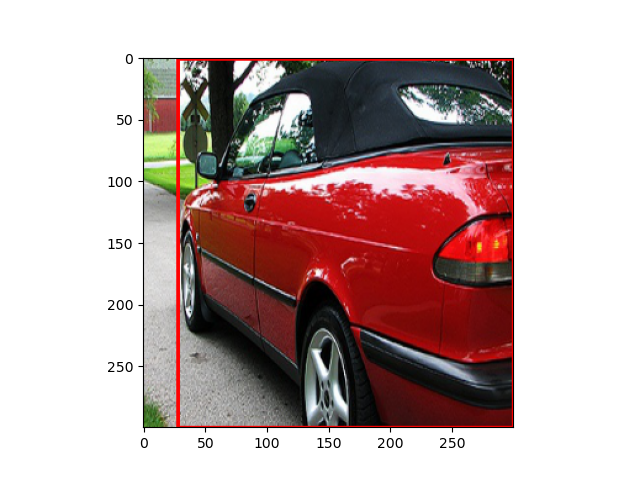

[[ 88 208 168 291]]
(88, 208) (168, 291)


<IPython.core.display.Javascript object>


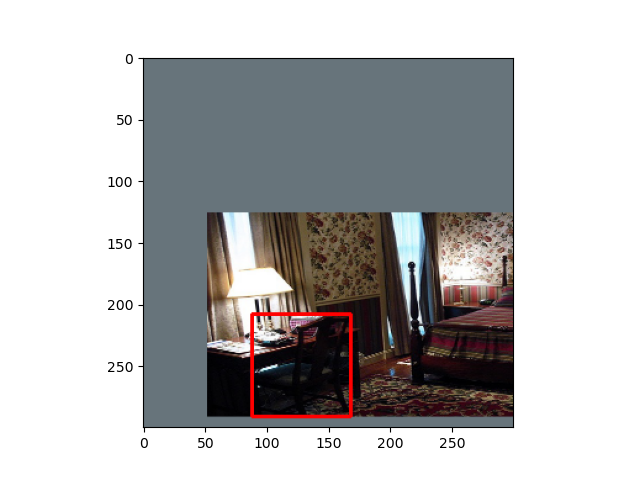

[[ 81  45 300 160]]
(81, 45) (300, 160)


<IPython.core.display.Javascript object>


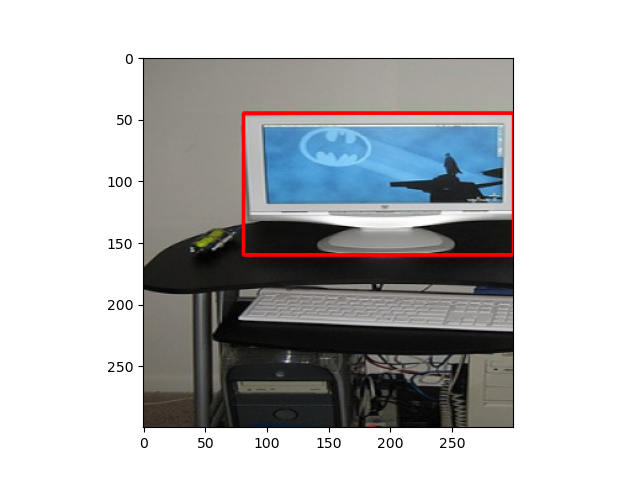

[[129 102 238 157]]
(129, 102) (238, 157)


<IPython.core.display.Javascript object>


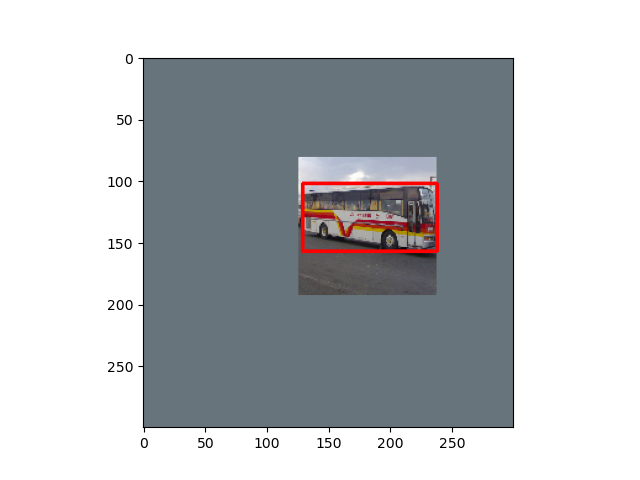

In [3]:
augmentation = augmentations.Compose([
    augmentations.RandomExpand(),
    augmentations.RandomSampled()
])

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)

## Random Flip

[[  0  45 215 297]]
(0, 45) (215, 297)


<IPython.core.display.Javascript object>


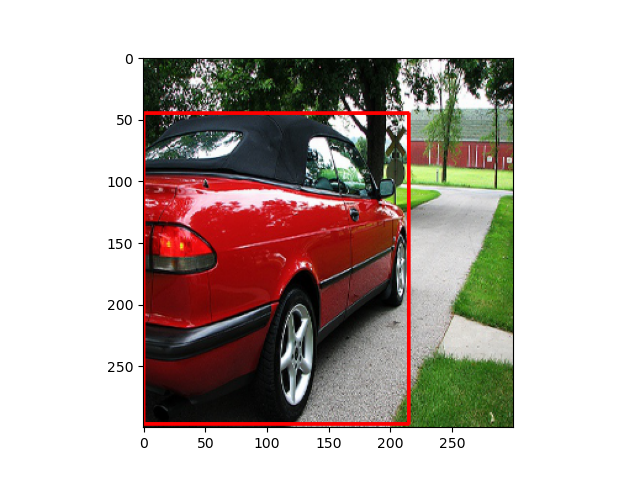

[[199 149 268 299]]
(199, 149) (268, 299)


<IPython.core.display.Javascript object>


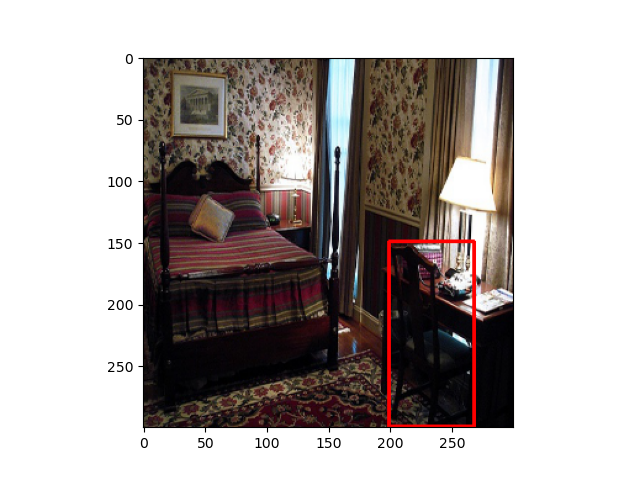

[[106  57 234 142]]
(106, 57) (234, 142)


<IPython.core.display.Javascript object>


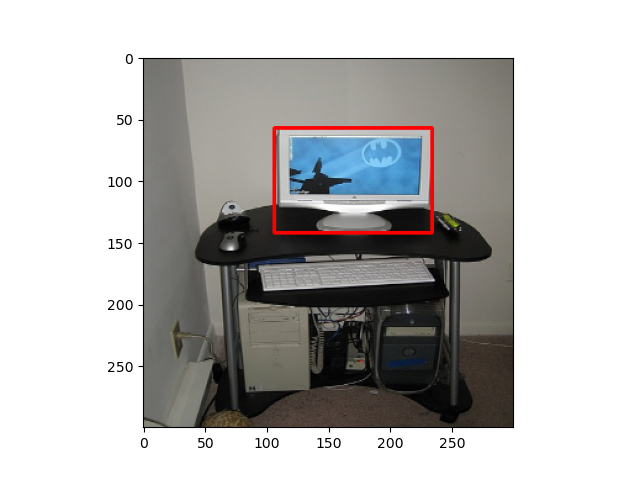

[[  0  58 291 205]]
(0, 58) (291, 205)


<IPython.core.display.Javascript object>


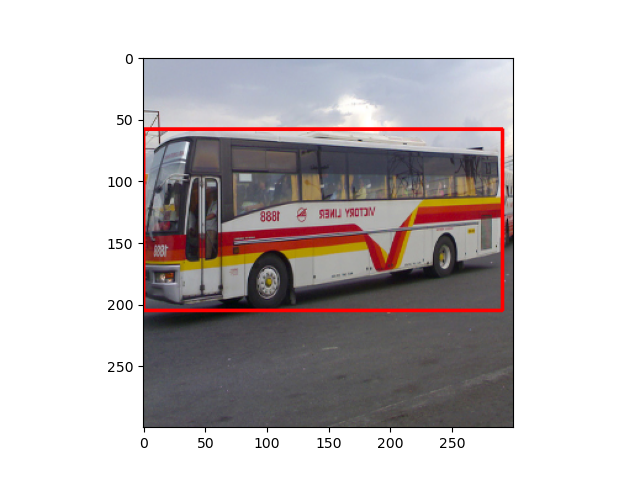

In [4]:
augmentation = augmentations.RandomFlip(p=1)

train_dataset = datasets.Compose(datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset),
                                 ignore=target_transforms.Ignore(difficult=True), transform=transform, target_transform=target_transform, augmentation=augmentation)

indices = [1, 100, 150, 10000]
for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectRGBimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)